author: William Wyatt

purpose: To both analize datasets produced by the game play file, along with replicated tables and data from the original paper. 

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import statsmodels.api as sm

In [124]:
# Running large dataset # 1
#pp_df = pd.read_csv('./dist/pp_df_1734392696.csv')
#ps_df = pd.read_csv('./dist/ps_df_1734392696.csv')
# Repeating same prompt #2
#pp_df = pd.read_csv('./dist/pp_df_1734393871.csv')
#ps_df = pd.read_csv('./dist/ps_df_1734393871.csv')

#This one is asking it to make a note for why it made its decision
#pp_df = pd.read_csv('./dist/pp_df_1734395183.csv')
#ps_df = pd.read_csv('./dist/ps_df_1734395183.csv')
#pp_df = pd.concat([pd.read_csv('./dist/pp_df_1734412911.csv'), pd.read_csv('./dist/pp_df_1734395183.csv')])
#ps_df = pd.concat([pd.read_csv('./dist/ps_df_1734412911.csv'), pd.read_csv('./dist/ps_df_1734395183.csv')])
#

In [125]:
# Mixed Strategy DataFrame: LLM Vs Mixed Strategy
mixed_pp_df = pd.read_csv('./dist/pp_df_1736822704.csv')
mixed_ps_df = pd.read_csv('./dist/ps_df_1736822704.csv')

In [126]:
# 50-50 Random Agent DataFrame: LLM vs CoinToss
#random_pp_df = pd.read_csv('./dist/pp_df_1734475400.csv')
#random_ps_df = pd.read_csv('./dist/ps_df_1734475400.csv')
random_pp_df = pd.read_csv('./dist/pp_df_1734473675.csv')
random_ps_df = pd.read_csv('./dist/ps_df_1734473675.csv')

In [127]:
# Main Dataframes of the basic game of LLM vs LLM
#pp_df = pd.read_csv('./dist/pp_df_1734412911.csv')
#ps_df = pd.read_csv('./dist/ps_df_1734412911.csv')
pp_df = pd.read_csv('./dist/pp_df_1734395183.csv')
ps_df = pd.read_csv('./dist/ps_df_1734395183.csv')

# Inject a Session counter into the dataframe
if 'session' not in  pp_df.columns:
    pp_df['session'] = pp_df.groupby('player').cumcount()//(pp_df['period'].max()+1)
    ps_df['session'] = ps_df.groupby('player').cumcount()//(ps_df['period'].max()+1)
if 'decision' in pp_df.columns:
    pp_df = pp_df.rename(columns={'decision': 'stag'})
    ps_df = ps_df.rename(columns={'decision': 'stag'})
    
print(f"Play-for-Pair rows {len(pp_df)}")
print(f"Play-for-Self rows {len(ps_df)}")

Play-for-Pair rows 15000
Play-for-Self rows 15000


In [128]:
# Rewrite the data frame now that session index has been added.
#pp_df.to_csv('./dist/play_for_pair_250107.csv', index=False)
#ps_df.to_csv('./dist/play_for_self_250107.csv', index=False)

Play-for-Pair Stag( 11404; 76.03% ) Hare( 3596; 23.97% )
Play-for-Self Stag( 9169; 61.13% ) Hare( 5831; 38.87% )


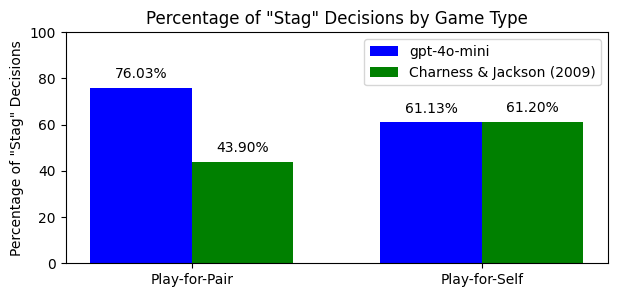

In [129]:
## Percentages

# Play-for-Pair
pp_total_decisions = len(pp_df)
pp_yes_decisions = pp_df[pp_df['stag'] == True].shape[0]
pp_percentage_yes = (pp_yes_decisions / pp_total_decisions) * 100

# Play-for-Self
ps_total_decisions = len(ps_df)
ps_yes_decisions = ps_df[ps_df['stag'] == True].shape[0]
ps_percentage_yes = (ps_yes_decisions / ps_total_decisions) * 100

# Your experiment's percentages
your_percentages = [pp_percentage_yes, ps_percentage_yes]

# Papers Results
paper_pp_percentage = 43.9
paper_ps_percentage = 61.2

paper_percentages = [paper_pp_percentage, paper_ps_percentage]

# Data for plotting
game_types = ['Play-for-Pair', 'Play-for-Self']
x = np.arange(len(game_types))  # the label locations
width = 0.35  # the width of the bars


def boostrap_errors(df):
    sample_size = len(df)
    means = []
    for _ in range(10_000):
        sample = df['stag'].sample(sample_size, replace=True)
        mean = sample.mean()
        means.append(mean)
    return np.percentile(means, [2.5, 97.5])
#pp_df_err = boostrap_errors(pp_df)
#ps_df_err = boostrap_errors(ps_df)
#print(pp_df_err)
#print(ps_df_err)

# Create the bar chart
plt.figure(figsize=(7, 3))
rects1 = plt.bar(x - width/2, your_percentages, width, label='gpt-4o-mini', color=['blue'], capsize=5)
rects2 = plt.bar(x + width/2, paper_percentages, width, label='Charness & Jackson (2009)', color=['green'])

# Add percentage labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height:.2f}%',
                     xy=(rect.get_x() + rect.get_width() / 2, height + 1),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Chart formatting
plt.title('Percentage of "Stag" Decisions by Game Type')
plt.ylabel('Percentage of "Stag" Decisions')
plt.xticks(x, game_types)
plt.ylim(0, 100)
plt.legend()

print(f"Play-for-Pair Stag( {pp_yes_decisions:03d}; {pp_yes_decisions/pp_total_decisions:.02%} ) Hare( {pp_total_decisions - pp_yes_decisions:03d}; {(pp_total_decisions - pp_yes_decisions)/pp_total_decisions:.02%} )")
print(f"Play-for-Self Stag( {ps_yes_decisions:03d}; {ps_yes_decisions/ps_total_decisions:.02%} ) Hare( {ps_total_decisions - ps_yes_decisions:03d}; {(ps_total_decisions - ps_yes_decisions)/ps_total_decisions:.02%} )")


plt.show()

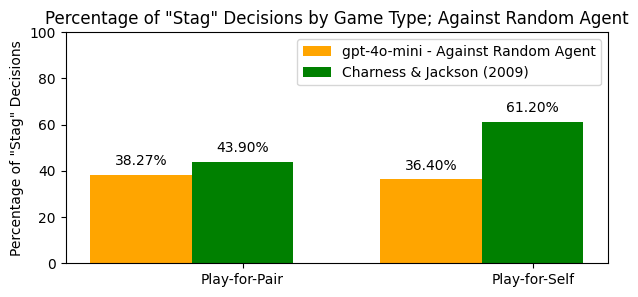

In [130]:
pp_llm,pp_random_agent = random_pp_df.groupby('player')['stag'].mean()*100
ps_llm,ps_random_agent = random_ps_df.groupby('player')['stag'].mean()*100

width = 0.35
# Papers Results
paper_pp_percentage = 43.9
paper_ps_percentage = 61.2
plt.figure(figsize=(7, 3))
rects1 = plt.bar(x - width, [pp_llm,ps_llm], width, label='gpt-4o-mini - Against Random Agent', color=['orange'])
#rects2 = plt.bar(x, [pp_random_agent,ps_random_agent], width, label='Random Agent', color=['red'])
rects3 = plt.bar(x, paper_percentages, width, label='Charness & Jackson (2009)', color=['green'])
plt.ylim(0,100)
autolabel(rects1)
#autolabel(rects2)
autolabel(rects3)
# Place horizontal dotted line at 50%
#plt.axhline(y=50, color='black', linestyle='--', alpha=0.3)
plt.title('Percentage of "Stag" Decisions by Game Type; Against Random Agent')
plt.ylabel('Percentage of "Stag" Decisions')
plt.xticks(x, game_types)
plt.ylim(0, 100)
plt.legend()
plt.legend()

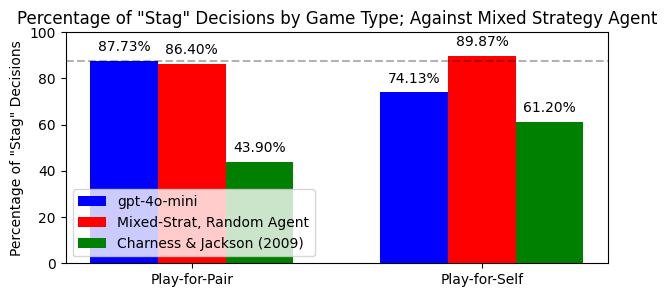

In [131]:
pp_llm,pp_random_agent = mixed_pp_df.groupby('player')['stag'].mean()*100
ps_llm,ps_random_agent = mixed_ps_df.groupby('player')['stag'].mean()*100
width = 0.35*2/3
# Papers Results
paper_pp_percentage = 43.9
paper_ps_percentage = 61.2
plt.figure(figsize=(7, 3))
rects1 = plt.bar(x - width, [pp_llm,ps_llm], width, label='gpt-4o-mini', color=['blue'])
rects2 = plt.bar(x, [pp_random_agent,ps_random_agent], width, label='Mixed-Strat, Random Agent', color=['red'])
rects3 = plt.bar(x + width, paper_percentages, width, label='Charness & Jackson (2009)', color=['green'])
plt.ylim(0,100)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
# Place horizontal dotted line at 50%
plt.axhline(y=87.5, color='black', linestyle='--', alpha=0.3)
plt.title('Percentage of "Stag" Decisions by Game Type; Against Mixed Strategy Agent')
plt.ylabel('Percentage of "Stag" Decisions')
plt.xticks(x, game_types)
plt.ylim(0, 100)
plt.legend()
plt.show()

    player  period   stag  payoff
0    Team1       0   True       9
1    Team2       0   True       9
2    Team1       1   True       9
3    Team2       1   True       9
4    Team1       2   True       9
..     ...     ...    ...     ...
745  Team2      12   True       9
746  Team1      13   True       1
747  Team2      13  False       8
748  Team1      14   True       9
749  Team2      14   True       9

[750 rows x 4 columns]


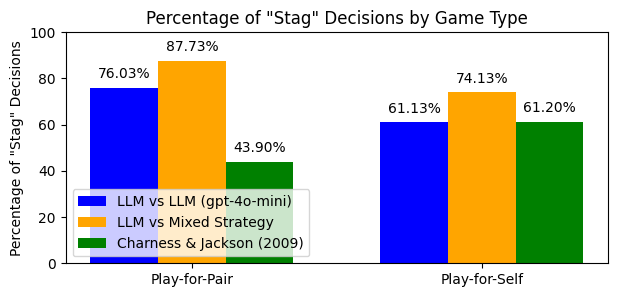

In [132]:
pp_llm,pp_random_agent = mixed_pp_df.groupby('player')['stag'].mean()*100
ps_llm,ps_random_agent = mixed_ps_df.groupby('player')['stag'].mean()*100

# Play-for-Pair
pp_total_decisions = len(pp_df)
pp_yes_decisions = pp_df[pp_df['stag'] == True].shape[0]
pp_percentage_yes = (pp_yes_decisions / pp_total_decisions) * 100

# Play-for-Self
ps_total_decisions = len(ps_df)
ps_yes_decisions = ps_df[ps_df['stag'] == True].shape[0]
ps_percentage_yes = (ps_yes_decisions / ps_total_decisions) * 100


print(mixed_pp_df)
width = 0.35*2/3
# Papers Results
paper_pp_percentage = 43.9
paper_ps_percentage = 61.2
plt.figure(figsize=(7, 3))
rects2 = plt.bar(x - width, your_percentages, width, label='LLM vs LLM (gpt-4o-mini)', color=['blue'], capsize=5)
rects1 = plt.bar(x , [pp_llm,ps_llm], width, label='LLM vs Mixed Strategy', color=['orange'])
rects3 = plt.bar(x + width, paper_percentages, width, label='Charness & Jackson (2009)', color=['green'])
plt.ylim(0,100)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
# Place horizontal dotted line at 50%
#plt.axhline(y=87.5, color='black', linestyle='--', alpha=0.3)
plt.title('Percentage of "Stag" Decisions by Game Type')
plt.ylabel('Percentage of "Stag" Decisions')
plt.xticks(x, game_types)
plt.ylim(0, 100)
plt.legend()

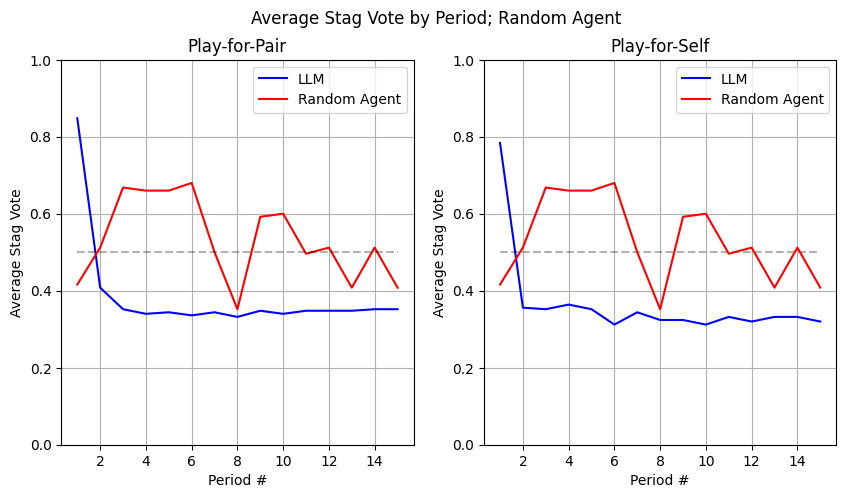

In [133]:
random_pp_rounds_players = random_pp_df.groupby(['player','period'])['stag'].mean().reset_index()
random_pp_rounds_random = random_pp_rounds_players[random_pp_rounds_players['player']=='Team2']['stag']
random_pp_rounds_llm = random_pp_rounds_players[random_pp_rounds_players['player']=='Team1']['stag']

random_ps_rounds_players = random_ps_df.groupby(['player','period'])['stag'].mean().reset_index()
random_ps_rounds_random = random_ps_rounds_players[random_ps_rounds_players['player']=='Player2']['stag']
random_ps_rounds_llm = random_ps_rounds_players[random_ps_rounds_players['player']=='Player1']['stag']

plt.figure(figsize=(10, 5))
plt.suptitle("Average Stag Vote by Period; Random Agent")
plt.subplot(1,2,1)
plt.title("Play-for-Pair")
plt.plot(np.linspace(1,15,15), random_pp_rounds_llm, label='LLM', color='blue')
plt.plot(np.linspace(1,15,15), random_pp_rounds_random, label='Random Agent', color='red')
plt.hlines(.5,1,15,linestyles='dashed',color='black',alpha=0.3)
plt.xlabel("Period #")
plt.ylabel("Average Stag Vote")
plt.legend()
plt.grid()
plt.ylim(0,1)

plt.subplot(1,2,2)
plt.title("Play-for-Self")
plt.plot(np.linspace(1,15,15), random_ps_rounds_llm, label='LLM', color='blue')
plt.hlines(.5,1,15,linestyles='dashed',color='black',alpha=0.3)
plt.plot(np.linspace(1,15,15), random_ps_rounds_random, label='Random Agent', color='red')
plt.xlabel("Period #")
plt.ylabel("Average Stag Vote")
plt.grid()
plt.legend()
plt.ylim(0,1)

plt.show()

In [134]:
# Last segment sum of decesion
print("Table-3; Stag Vote Totals for groups in the last period of a segment")
print(pp_df[pp_df['period']==14].groupby(['session','player'])['stag'].sum().groupby('session').sum().value_counts())
print(ps_df[ps_df['period']==14].groupby(['session','player'])['stag'].sum().groupby('session').sum().value_counts())

Table-3; Stag Vote Totals for groups in the last period of a segment
stag
2    375
0    125
Name: count, dtype: int64
stag
2    294
0    205
1      1
Name: count, dtype: int64


In [135]:
# first segment sum of decesion
print("Stag Vote Totals for groups in the first period of a segment")
print(pp_df[pp_df['period']==0].groupby(['session','player'])['stag'].sum().groupby('session').sum().value_counts())
print(ps_df[ps_df['period']==0].groupby(['session','player'])['stag'].sum().groupby('session').sum().value_counts())

Stag Vote Totals for groups in the first period of a segment
stag
2    379
1    108
0     13
Name: count, dtype: int64
stag
2    320
1    161
0     19
Name: count, dtype: int64


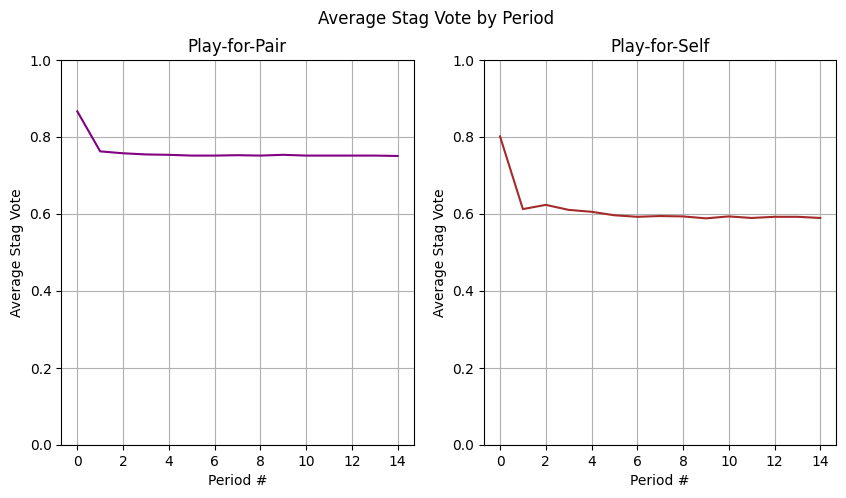

In [136]:
plt.figure(figsize=(10, 5))
plt.suptitle("Average Stag Vote by Period")
plt.subplot(1,2,1)
plt.title("Play-for-Pair")
pp_df.groupby(['period'])['stag'].mean().plot(color='purple')

plt.xlabel("Period #")
plt.ylabel("Average Stag Vote")
plt.grid()
plt.ylim(0,1)

plt.subplot(1,2,2)
plt.title("Play-for-Self")
ps_df.groupby(['period'])['stag'].mean().plot(color='brown')
plt.xlabel("Period #")
plt.ylabel("Average Stag Vote")
plt.grid()
plt.ylim(0,1)

plt.show()

## Recreate Table 2
Individual proﬁles.

In [137]:
pp_df.groupby(['session','player'])['stag'].mean()

session  player
0        Team1     1.000000
         Team2     1.000000
1        Team1     0.000000
         Team2     0.066667
2        Team1     1.000000
                     ...   
497      Team2     1.000000
498      Team1     1.000000
         Team2     1.000000
499      Team1     1.000000
         Team2     1.000000
Name: stag, Length: 1000, dtype: float64

## Recreate Table 3

Stag vote totals for groups in last period of segment.

In [138]:
# Filter for the maximum period and compute value counts for "Play-for-Pair"
pfp_counts = (pp_df[pp_df['period'] == pp_df['period'].max()]
              .groupby('session')['stag'].sum()
              .value_counts()
              .rename("Play-for-Pair"))

# Do the same for "Play-for-Self"
pfs_counts = (ps_df[ps_df['period'] == ps_df['period'].max()]
              .groupby('session')['stag'].sum()
              .value_counts()
              .rename("Play-for-Self"))


# Combine into a single DataFrame
df = pd.concat([pfp_counts, pfs_counts], axis=1)

# Reset index to get a column for the outcome
df = df.reset_index().rename(columns={'index': 'Outcome'})

# Print using tabulate
print(tabulate(df, headers=df.columns, tablefmt="pretty", showindex=False))

+------+---------------+---------------+
| stag | Play-for-Pair | Play-for-Self |
+------+---------------+---------------+
| 2.0  |     375.0     |     294.0     |
| 0.0  |     125.0     |     205.0     |
| 1.0  |      nan      |      1.0      |
+------+---------------+---------------+


## Recreate Table 4
Outcomes: number of observations (percentages), by category.

In [139]:
# Compute value counts
pfp_counts = pp_df.groupby(['session','period'])['stag'].sum().value_counts().rename("Play-for-Pair")
pfs_counts = ps_df.groupby(['session','period'])['stag'].sum().value_counts().rename("Play-for-Self")

# Combine into a single DataFrame
df = pd.concat([pfp_counts, pfs_counts], axis=1)

# Reset index so we have a named column for outcomes
df = df.reset_index().rename(columns={'index': 'Outcome'})

# Print in a tabulated format
print(tabulate(df, headers=df.columns, tablefmt="pretty", showindex=False))

+------+---------------+---------------+
| stag | Play-for-Pair | Play-for-Self |
+------+---------------+---------------+
|  2   |     5629      |     4425      |
|  0   |     1725      |     2756      |
|  1   |      146      |      319      |
+------+---------------+---------------+


## Recreate Table 5
Rates of Stag play over time, by game.

In [140]:
# First five periods
pp_df_first_five = pp_df[pp_df['period'] < 5]
ps_df_first_five = ps_df[ps_df['period'] < 5]

# Middle five periods
pp_df_middle_five = pp_df[(pp_df['period'] >= 5) & (pp_df['period'] < 10)]
ps_df_middle_five = ps_df[(ps_df['period'] >= 5) & (ps_df['period'] < 10)]

# Last five periods
pp_df_last_five = pp_df[pp_df['period'] >= 10]
ps_df_last_five = ps_df[ps_df['period'] >= 10]

# Total sum of stag decisions for each player by each period group
pp_first_five = pp_df_first_five['stag'].mean()
ps_first_five = ps_df_first_five['stag'].mean()

pp_middle_five = pp_df_middle_five['stag'].mean()
ps_middle_five = ps_df_middle_five['stag'].mean()

pp_last_five = pp_df_last_five['stag'].mean()
ps_last_five = ps_df_last_five['stag'].mean()

data = [
    ["First Five Periods", f"{pp_first_five:.2%}", f"{ps_first_five:.2%}"],
    #["First Five Periods Sum", pp_df_first_five["stag"].sum(), ps_df_first_five["stag"].sum()],
    ["Middle Five Periods", f"{pp_middle_five:.2%}", f"{ps_middle_five:.2%}"],
    #["Middle Five Periods Sum", pp_df_middle_five["stag"].sum(), ps_df_middle_five["stag"].sum()],
    ["Last Five Periods", f"{pp_last_five:.2%}", f"{ps_last_five:.2%}"],
    #["Last Five Periods Sum", pp_df_last_five["stag"].sum(), ps_df_last_five["stag"].sum()],
    ["Total Stag", pp_df["stag"].sum(), ps_df["stag"].sum()],
    ["Count", len(pp_df), len(ps_df)]
]


print(tabulate(data, headers=["", "Play-for-Pair", "Play-for-Self"], tablefmt="pretty"))


+---------------------+---------------+---------------+
|                     | Play-for-Pair | Play-for-Self |
+---------------------+---------------+---------------+
| First Five Periods  |    77.84%     |    65.02%     |
| Middle Five Periods |    75.16%     |    59.26%     |
|  Last Five Periods  |    75.08%     |    59.10%     |
|     Total Stag      |     11404     |     9169      |
|        Count        |     15000     |     15000     |
+---------------------+---------------+---------------+


## Recreate Table 6
Individual choice tendencies, by game.

In [141]:
from tabulate import tabulate
pp_mostly_stag = (pp_df.groupby(['session','player'])['stag'].sum() > 10).sum()
pp_mix = (pp_df.groupby(['session','player'])['stag'].sum() > 6).sum() - pp_mostly_stag
pp_mostly_hare = (pp_df.groupby(['session','player'])['stag'].sum() <= 6).sum()

ps_mostly_stag = (ps_df.groupby(['session','player'])['stag'].sum() > 10).sum()
ps_mix = (ps_df.groupby(['session','player'])['stag'].sum() > 6).sum() - ps_mostly_stag
ps_mostly_hare = (ps_df.groupby(['session','player'])['stag'].sum() <= 6).sum()

pp_first_last = (pp_df[(pp_df['period']==0) | (pp_df['period']==pp_df['period'].max())].groupby(['session','player'])['stag'].sum().reset_index()['stag']==1).sum()
ps_first_last = (ps_df[(ps_df['period']==0) | (ps_df['period']==ps_df['period'].max())].groupby(['session','player'])['stag'].sum().reset_index()['stag']==1).sum()

pp_df_first_last = (pp_df[(pp_df['period']==0) | (pp_df['period']==pp_df['period'].max())]).copy()
ps_df_first_last = (ps_df[(ps_df['period']==0) | (ps_df['period']==ps_df['period'].max())]).copy()

pp_df_first_last['stag_int'] = pp_df_first_last['stag'].astype(int)
pp_df_first_last['stag_shift'] = pp_df_first_last.groupby(['session','player'])['stag'].shift()
pp_df_first_last['stag_diff'] = (pp_df_first_last['stag'] - pp_df_first_last['stag_shift'])

ps_df_first_last['stag_int'] = ps_df_first_last['stag'].astype(int)
ps_df_first_last['stag_shift'] = ps_df_first_last.groupby(['session','player'])['stag'].shift()
ps_df_first_last['stag_diff'] = (ps_df_first_last['stag'] - ps_df_first_last['stag_shift'])


print(pp_df[(pp_df['period']==0) | (pp_df['period']==pp_df['period'].max())].groupby(['session','player'])['stag'].diff().value_counts())
print(ps_df[(ps_df['period']==0) | (ps_df['period']==ps_df['period'].max())].groupby(['session','player'])['stag'].diff().value_counts())

total = len(ps_df.groupby(['session','player']))

data = [
    ["Play for Pair", pp_mostly_stag, pp_mix, pp_mostly_hare, pp_first_last, total],
    ["Play for Self", ps_mostly_stag, ps_mix, ps_mostly_hare, ps_first_last, total]
]

headers = ["Category", "Mostly Stag", "Mix", "Mostly Hare", "Switch", "Total"]
#print(pp_mix)
print(tabulate(data, headers=headers, tablefmt="grid"))
#ps_df_first_last[ps_df_first_last['stag_diff']!=0].dropna().head(50).sort_values(['session','player','period']).dropna()[['stag','stag_shift','stag_diff']]

stag
0     884
-1    116
Name: count, dtype: int64
stag
0     788
-1    212
Name: count, dtype: int64
+---------------+---------------+-------+---------------+----------+---------+
| Category      |   Mostly Stag |   Mix |   Mostly Hare |   Switch |   Total |
+===============+===============+=======+===============+==========+=========+
| Play for Pair |           750 |     1 |           249 |      116 |    1000 |
+---------------+---------------+-------+---------------+----------+---------+
| Play for Self |           586 |     7 |           407 |      212 |    1000 |
+---------------+---------------+-------+---------------+----------+---------+


# Recreate Table 7

In [142]:
_pp_df = pp_df.copy()
_pp_df['bad_outcome'] = _pp_df['payoff']==1
_pp_df = _pp_df.merge(_pp_df.groupby(['session','player'])['bad_outcome'].sum().reset_index().rename(columns={'bad_outcome':'bad_outcomes'}), on=['session','player'], how='left')
_pp_df

,player,period,stag,payoff,session,bad_outcome,bad_outcomes
0,Team1,0,True,9,0,False,0
1,Team2,0,True,9,0,False,0
2,Team1,1,True,9,0,False,0
3,Team2,1,True,9,0,False,0
4,Team1,2,True,9,0,False,0
...,...,...,...,...,...,...,...
14995,Team2,12,True,9,499,False,0
14996,Team1,13,True,9,499,False,0
14997,Team2,13,True,9,499,False,0
14998,Team1,14,True,9,499,False,0


# Effects of Switching


In [143]:
def xnor(group):
    return group.all() or ~group.any()  

In [144]:
#Pritn out the function map_shift in its code

In [145]:
pp_df

,player,period,stag,payoff,session
0,Team1,0,True,9,0
1,Team2,0,True,9,0
2,Team1,1,True,9,0
3,Team2,1,True,9,0
4,Team1,2,True,9,0
...,...,...,...,...,...
14995,Team2,12,True,9,499
14996,Team1,13,True,9,499
14997,Team2,13,True,9,499
14998,Team1,14,True,9,499


In [146]:
def map_shift(shift):
    if shift == 0:
        return 'No Shift'
    elif shift==1:
        return 'Hare to Stag'
    elif shift==-1:
        return 'Stag to Hare'
def get_mix(df):
    df = df.copy()
    
    #df['disagree'] = df.groupby(['session','period'])['stag'].transform(lambda x: (x==1).all() or (x==0).all())
    df['bad_outcome'] = df.groupby(['session','player'])['payoff'].transform(lambda x: (x==1).any())
    df['two_bad_outcomes'] = df.groupby(['session','player'])['payoff'].transform(lambda x: (x==1).sum()==2)
    df['more_bad_outcomes'] = df.groupby(['session','player'])['payoff'].transform(lambda x: (x==1).sum()>=3)
    df['bad_outcomes'] = df.groupby(['session','player'])['payoff'].transform(lambda x: (x==1).sum())
    df['shift'] = df.sort_values(['session','player','period']).groupby(['session','player'])['stag'].diff()
    #df['lag_5'] = df.sort_values(['session','player','period']).groupby(['session','player'])['shift'].diff()*-1
    #df['lag_4'] = df.sort_values(['session','player','period']).groupby(['session','player'])['lag_5'].diff()*-1
    #df['lag_3'] = df.sort_values(['session','player','period']).groupby(['session','player'])['lag_4'].diff()*-1
    #df['lag_2'] = df.sort_values(['session','player','period']).groupby(['session','player'])['lag_3'].diff()*-1
    #df['lag_1'] = df.sort_values(['session','player','period']).groupby(['session','player'])['lag_2'].diff()*-1
    
    df['shift_label'] = df['shift'].map(map_shift)
    
    #df['stag->hare'] = df['shift_label'] == 'Stag to Hare'
    #df['hare->stag'] = df['shift_label'] == 'Hare to Stag'
    #df['no-shift'] = df['shift_label'] == 'No Shift'    
    df['stag->hare'] = df.groupby(['session'])['shift'].transform(lambda x: (x==-1).any())
    df['hare->stag'] = df.groupby(['session'])['shift'].transform(lambda x: (x==1).any())
    df['no-shift'] = df.groupby(['session'])['shift'].transform(lambda x: (x==0).any())
    df_agree = df.sort_values(['session','period','player']).groupby(['session','period'])['stag'].apply(xnor).reset_index()
    df_agree.rename(columns={'stag':'agree'},inplace=True)
    df = df.merge(df_agree, on=['session','period'], how='left')
    session_agree = df.sort_values(['session','player','period']).groupby('session')['agree'].all().reset_index().rename(columns={'agree':'session_agree'})
    df = df.merge(session_agree, on='session', how='left')
    return df
pp_mix = get_mix(pp_df)
ps_mix = get_mix(ps_df)

In [147]:
pp_mix['bad_outcomes'].value_counts()

bad_outcomes
0    13245
1     1455
2      240
3       30
4       15
7       15
Name: count, dtype: int64

In [148]:
pp_mix[pp_mix['session_agree']==False].head(30)

,player,period,stag,payoff,session,bad_outcome,two_bad_outcomes,more_bad_outcomes,bad_outcomes,shift,shift_label,stag->hare,hare->stag,no-shift,agree,session_agree
30,Team1,0,False,8,1,False,False,False,0,NaN,None,True,False,True,False,False
31,Team2,0,True,1,1,True,False,False,1,NaN,None,True,False,True,False,False
32,Team1,1,False,8,1,False,False,False,0,0,No Shift,True,False,True,True,False
33,Team2,1,False,8,1,True,False,False,1,-1,Stag to Hare,True,False,True,True,False
34,Team1,2,False,8,1,False,False,False,0,0,No Shift,True,False,True,True,False
35,Team2,2,False,8,1,True,False,False,1,0,No Shift,True,False,True,True,False
36,Team1,3,False,8,1,False,False,False,0,0,No Shift,True,False,True,True,False
37,Team2,3,False,8,1,True,False,False,1,0,No Shift,True,False,True,True,False
38,Team1,4,False,8,1,False,False,False,0,0,No Shift,True,False,True,True,False
39,Team2,4,False,8,1,True,False,False,1,0,No Shift,True,False,True,True,False


In [149]:
pp_mix['play_for_self'] = False
ps_mix['play_for_self'] = True
pp_ps_mix = pd.concat([pp_mix,ps_mix])

In [150]:
y = pp_ps_mix[pp_mix['period']==14]['stag'].astype(int)
X = pp_ps_mix[pp_mix['period']==14][['play_for_self', 'bad_outcome','two_bad_outcomes','more_bad_outcomes']].astype(int)
X = sm.add_constant(X)
model = sm.Probit(y, X).fit(maxiter=1000)
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.443113
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   stag   No. Observations:                 2000
Model:                         Probit   Df Residuals:                     1995
Method:                           MLE   Df Model:                            4
Date:                Thu, 06 Feb 2025   Pseudo R-squ.:                  0.3017
Time:                        15:29:06   Log-Likelihood:                -886.23
converged:                       True   LL-Null:                       -1269.1
Covariance Type:            nonrobust   LLR p-value:                2.086e-164
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.9979      0.050     19.941      0.000       0.900       1.096
play_for

/tmp/ipykernel_5943/2188452684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = pp_ps_mix[pp_mix['period']==14]['stag'].astype(int)
/tmp/ipykernel_5943/2188452684.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = pp_ps_mix[pp_mix['period']==14][['play_for_self', 'bad_outcome','two_bad_outcomes','more_bad_outcomes']].astype(int)


In [151]:
pp_mix[pp_mix['session_agree']==False].sort_values(['session','period','player'])

,player,period,stag,payoff,session,bad_outcome,two_bad_outcomes,more_bad_outcomes,bad_outcomes,shift,shift_label,stag->hare,hare->stag,no-shift,agree,session_agree,play_for_self
30,Team1,0,False,8,1,False,False,False,0,NaN,None,True,False,True,False,False,False
31,Team2,0,True,1,1,True,False,False,1,NaN,None,True,False,True,False,False,False
32,Team1,1,False,8,1,False,False,False,0,0,No Shift,True,False,True,True,False,False
33,Team2,1,False,8,1,True,False,False,1,-1,Stag to Hare,True,False,True,True,False,False
34,Team1,2,False,8,1,False,False,False,0,0,No Shift,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14785,Team2,12,False,8,492,False,False,False,0,0,No Shift,True,False,True,True,False,False
14786,Team1,13,False,8,492,True,False,False,1,0,No Shift,True,False,True,True,False,False
14787,Team2,13,False,8,492,False,False,False,0,0,No Shift,True,False,True,True,False,False
14788,Team1,14,False,8,492,True,False,False,1,0,No Shift,True,False,True,True,False,False


Play for Pair period
0     0.784
1     0.968
2     0.986
3     0.992
4     0.998
5     0.998
6     0.998
7     0.996
8     0.998
9     0.998
10    0.998
11    0.998
12    0.998
13    0.998
14    1.000
Name: agree, dtype: float64
Play for Pair period
0      784
1      968
2      986
3      992
4      998
5      998
6      998
7      996
8      998
9      998
10     998
11     998
12     998
13     998
14    1000
Name: agree, dtype: int64
Play for self period
0     0.678
1     0.924
2     0.922
3     0.960
4     0.962
5     0.984
6     0.988
7     0.992
8     0.990
9     0.996
10    0.990
11    0.994
12    0.992
13    0.992
14    0.998
Name: agree, dtype: float64
Play for self period
0     678
1     924
2     922
3     960
4     962
5     984
6     988
7     992
8     990
9     996
10    990
11    994
12    992
13    992
14    998
Name: agree, dtype: int64


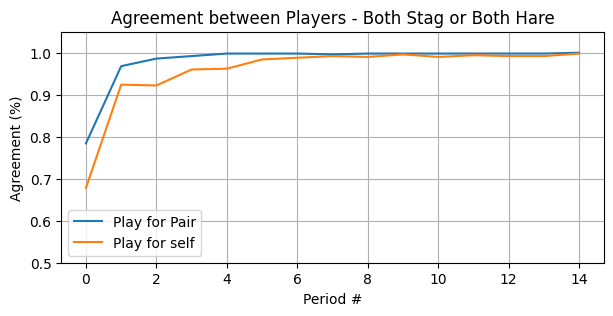

In [152]:
pp_mix.sort_values(['session','period','player'],inplace=True)
def plot_agreement(df,label=""):
    plt.title("Agreement between Players - Both Stag or Both Hare")
    plt.plot(df.groupby(['period'])['agree'].mean(),label=label)
    print(label, df.groupby(['period'])['agree'].mean())
    print(label, df.groupby(['period'])['agree'].sum())
    plt.xlabel("Period #")
    plt.ylabel("Agreement (%)")
    plt.ylim([0.5,1.05])

plt.figure(figsize=(7, 3))
plot_agreement(pp_mix, "Play for Pair")
plot_agreement(ps_mix, "Play for self")
plt.grid()
plt.legend()
plt.show()

In [153]:
pp_mix[pp_mix['agree']==False]

,player,period,stag,payoff,session,bad_outcome,two_bad_outcomes,more_bad_outcomes,bad_outcomes,shift,shift_label,stag->hare,hare->stag,no-shift,agree,session_agree,play_for_self
30,Team1,0,False,8,1,False,False,False,0,NaN,None,True,False,True,False,False,False
31,Team2,0,True,1,1,True,False,False,1,NaN,None,True,False,True,False,False,False
90,Team1,0,False,8,3,False,False,False,0,NaN,None,True,False,True,False,False,False
91,Team2,0,True,1,3,True,False,False,1,NaN,None,True,False,True,False,False,False
120,Team1,0,True,1,4,True,False,False,1,NaN,None,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14311,Team2,0,True,1,477,True,False,False,1,NaN,None,True,False,True,False,False,False
14490,Team1,0,False,8,483,False,False,False,0,NaN,None,True,False,True,False,False,False
14491,Team2,0,True,1,483,True,False,False,1,NaN,None,True,False,True,False,False,False
14760,Team1,0,True,1,492,True,False,False,1,NaN,None,True,False,True,False,False,False


In [154]:
print('play for pair - Given Agreement', pp_mix[pp_mix['agree']==True].shift_label.value_counts(normalize=True))
print('play for self - Given Agreement', ps_mix[ps_mix['agree']==True].shift_label.value_counts(normalize=True))
# Now the opposite
print('play for pair - Given Disagreement', pp_mix[pp_mix['agree']==False].shift_label.value_counts(normalize=True))
print('play for self - Given Disagreement', ps_mix[ps_mix['agree']==False].shift_label.value_counts(normalize=True))


play for pair - Given Agreement shift_label
No Shift        0.990879
Stag to Hare    0.008690
Hare to Stag    0.000431
Name: proportion, dtype: float64
play for self - Given Agreement shift_label
No Shift        0.979465
Stag to Hare    0.019000
Hare to Stag    0.001535
Name: proportion, dtype: float64
play for pair - Given Disagreement shift_label
No Shift        0.723684
Stag to Hare    0.144737
Hare to Stag    0.131579
Name: proportion, dtype: float64
play for self - Given Disagreement shift_label
No Shift        0.585443
Hare to Stag    0.250000
Stag to Hare    0.164557
Name: proportion, dtype: float64


In [155]:
def calculate_per_period_shifts(data, agree_condition):
    per_period = (
        data[data['agree'] == agree_condition]
        .groupby('period')['shift_label']
        .value_counts() # Add in empty values
        .rename('count')
        .reset_index()
    )
    # Add the proportion
    per_period['proportion'] = per_period.groupby('period')['count'].transform(lambda x: x / x.sum())
    return per_period

In [156]:
np.array([[i]*3 for i in range(15)]).reshape(-1)

array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11,
       11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14])

In [157]:
pp_agree = calculate_per_period_shifts(pp_mix, agree_condition=True)
ps_agree = calculate_per_period_shifts(ps_mix, agree_condition=True)
pp_disagree = calculate_per_period_shifts(pp_mix, agree_condition=False)
ps_disagree = calculate_per_period_shifts(ps_mix, agree_condition=False)



template = pd.DataFrame({'period': np.array([[i]*3 for i in range(15)]).reshape(-1), 'shift_label': ['No Shift', 'Stag to Hare', 'Hare to Stag']*15})
pp_agree = template.merge(pp_agree, on=['period', 'shift_label'], how='left').fillna(0)
ps_agree = template.merge(ps_agree, on=['period', 'shift_label'], how='left').fillna(0)
pp_disagree = template.merge(pp_disagree, on=['period', 'shift_label'], how='left').fillna(0)
ps_disagree = template.merge(ps_disagree, on=['period', 'shift_label'], how='left').fillna(0)

print("Play for Pair Agree", pp_agree)
print("Play for Self Agree", ps_agree)
print("Play for Pair Disagree", pp_disagree)
print("Play for Self Disagree", ps_disagree)


Play for Pair Agree     period   shift_label  count  proportion
0        0      No Shift    0.0    0.000000
1        0  Stag to Hare    0.0    0.000000
2        0  Hare to Stag    0.0    0.000000
3        1      No Shift  870.0    0.898760
4        1  Stag to Hare   98.0    0.101240
5        1  Hare to Stag    0.0    0.000000
6        2      No Shift  973.0    0.986815
7        2  Stag to Hare   11.0    0.011156
8        2  Hare to Stag    2.0    0.002028
9        3      No Shift  987.0    0.994960
10       3  Stag to Hare    5.0    0.005040
11       3  Hare to Stag    0.0    0.000000
12       4      No Shift  993.0    0.994990
13       4  Stag to Hare    3.0    0.003006
14       4  Hare to Stag    2.0    0.002004
15       5      No Shift  997.0    0.998998
16       5  Stag to Hare    1.0    0.001002
17       5  Hare to Stag    0.0    0.000000
18       6      No Shift  998.0    1.000000
19       6  Stag to Hare    0.0    0.000000
20       6  Hare to Stag    0.0    0.000000
21       7  

Play for Pair - Agreement     period   shift_label  count  proportion
0        0      No Shift    0.0    0.000000
1        0  Stag to Hare    0.0    0.000000
2        0  Hare to Stag    0.0    0.000000
3        1      No Shift  870.0    0.898760
4        1  Stag to Hare   98.0    0.101240
5        1  Hare to Stag    0.0    0.000000
6        2      No Shift  973.0    0.986815
7        2  Stag to Hare   11.0    0.011156
8        2  Hare to Stag    2.0    0.002028
9        3      No Shift  987.0    0.994960
10       3  Stag to Hare    5.0    0.005040
11       3  Hare to Stag    0.0    0.000000
12       4      No Shift  993.0    0.994990
13       4  Stag to Hare    3.0    0.003006
14       4  Hare to Stag    2.0    0.002004
15       5      No Shift  997.0    0.998998
16       5  Stag to Hare    1.0    0.001002
17       5  Hare to Stag    0.0    0.000000
18       6      No Shift  998.0    1.000000
19       6  Stag to Hare    0.0    0.000000
20       6  Hare to Stag    0.0    0.000000
21    

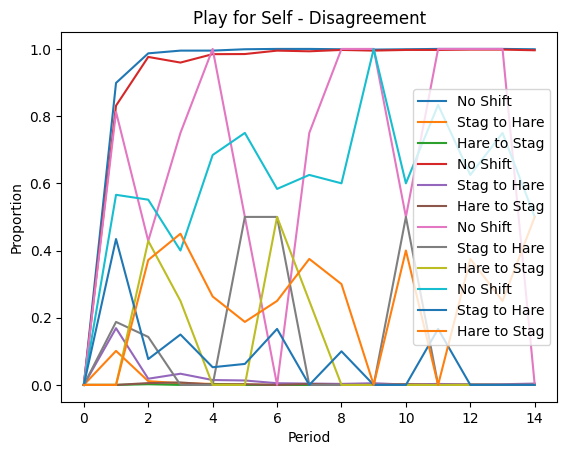

In [158]:

# Plotting function for the per-period average shifting
def plot_per_period_shifts(per_period_data, title):
    
    print(title, per_period_data)
    for shift_label in per_period_data['shift_label'].unique():
        subset = per_period_data[per_period_data['shift_label'] == shift_label]
        plt.plot(subset['period'], subset['proportion'], label=shift_label)

    plt.title(title)
    plt.xlabel('Period')
    plt.ylabel('Proportion')
    plt.legend()

# Plot the results for each scenario
plot_per_period_shifts(pp_agree, "Play for Pair - Agreement")
plot_per_period_shifts(ps_agree, "Play for Self - Agreement")
plot_per_period_shifts(pp_disagree, "Play for Pair - Disagreement")
plot_per_period_shifts(ps_disagree, "Play for Self - Disagreement")

plt.show()